#### AI 헬스케어 첫번째 미니 프로젝트 “흡연 여부 데이터 분석을 통한 건강 인사이트 도출” 에 오신 1기 여러분 환영합니다.
이번 프로젝트에서는 흡연여부를 판단하는 데이터를 가지고 시각화 및 가설을 판별해보려고 합니다.


A-Z로 진행되는 만큼 천천히 따라해보세요!

#### 팀 과제
- 데이터 구조, 분포 확인, 전처리 : 1.1_흡연여부데이터
- 데이터 간 관계 가설 수립 및 검증 : 1.2_데이터분석



### 흡연여부데이터 분석하기
최근 여러 기관에서는 흡연이 개인의 건강에 미치는 영향을 정확히 파악하고,
이를 기반으로 예방 중심의 건강관리 정책을 수립하려는 노력을 강화하고 있습니다.

하지만 “흡연 여부”를 직접 조사하는 것은 현실적으로 쉽지 않습니다.
이에 따라, 건강검진 데이터를 통해 흡연 여부를 데이터 기반으로 추정하고,
흡연자와 비흡연자 간의 생체·건강 지표 차이를 검증하려는 프로젝트가 시작되었습니다.

여러분은 이 프로젝트의 데이터 분석가이자 AI 엔지니어로 참여하게 되었습니다.
주어진 데이터에는 개인의 건강검진 결과(혈압, 혈당, 콜레스테롤, BMI 등)와
흡연 여부(label = 0 또는 1)가 포함되어 있습니다.

이제 여러분의 역할은 흡연 여부 데이터의 특성을 분석하고 시각화하며,
통계적 검정을 통해 변수 간 관계를 규명하는 것입니다.
시작해봅시다 !

#### 🎯 프로젝트 목표

	•	흡연자와 비흡연자 간의 건강 지표 차이 분석
	•	주요 변수들의 분포, 상관관계, 통계적 유의성 검증
	•	시각화를 통한 데이터 인사이트 도출
	•	추후 흡연 여부 예측 모델 개발을 위한 기초 분석 기반 마련




---



### 1. 가설 수립 (인당 최소 3개)

건강 지표별로 흡연자/비흡연자 간 통계적 차이 검증

(예시)
- H₀ (귀무가설): BMI- 흡연자와 비흡연자의 평균 BMI는 같다.
- H₁ (대립가설): BMI- 흡연자와 비흡연자의 평균 BMI는 다르다.

In [ ]:
### 아래에 3가지의 가설을 설정해보세요.
# 가설 1. 흡연자의 헤모글로빈 (g/mL) 수치는 비흡연자보다 높다
# 가설 2. 흡연자의 혈청 크레아티닌 수치는 비흡연자보다 높다. 
# 가설 3. 헤모글로빈 수치가 오르면 혈청 크레아티닌 수치도 오른다. 
# 가설 4 흡연을 하면 혈청 크레아티닌과 헤모글로빈 수치가 오른다. 
# 가설 5 요단백과 혈청 크레아티닌 수치는 연관이 있다. 
# 가설 6. 흡연자의 간효소율은 낮을 것이다.
# 가설 7. 간효소율이 낮아지면 헤모글로빈 수치는 오를 것이다. 
# 가설 8. 흡연자의 간효소율과 헤모글로빈 수치는 유의미한 상관성이 있다. 

## 2. 단변량 분석

	단변량 분석 의미 찾기:

    •	데이터 품질(결측, 이상치) 확인

    •	모델 입력값 기준 설정

- 숫자형, 범주형
- 전처리 사항
  - NaN 존재 여부 및 조치 방안
  - 가변수화 대상여부
- 기초통계량 확인
- 분포 확인
- 위 정보로부터 파악한 비즈니스 내용 정리
- 추가 분석해볼 사항 도출

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('smoking_health_data.csv')
df.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,0.9,232,62,151,13.8,1,1.32,0


In [3]:
# 숫자형 : ['나이', '키', '몸무게', BMI, 시력, 공복 혈당, 혈압, 중성지방, 혈청크레아티닌, 콜레스테롤, 고밀도지단백, 저밀도지단백, 헤모글로빈, 간 효소율 
# 범주형 : ['충치', '요단백', 'label']

# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 결측치 채우기 
df['나이대'] = pd.cut(
    df['나이'],
    bins=[0, 30, 50, 70, float('inf')],
    labels=['30대 이하', '30~50대', '50~70대', '70대 이상']
)
df['체중상태 구분'] = pd.cut(
    df['BMI'],
    bins=[0, 18.5, 25, 30, float('inf')],
    labels=['저체중', '정상', '과체중', '비만']
)

# 결측치 채우기
df_imp = df.copy()

df_imp['시력'] = df_imp['시력'].fillna(
    df.groupby('나이대')['시력'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.median())
)
df_imp['공복 혈당'] = df_imp['공복 혈당'].fillna(df.groupby('체중상태 구분')['공복 혈당'].transform('median'))
df_imp['혈압'] = df_imp['혈압'].fillna(df.groupby('나이대')['혈압'].transform('median'))
df_imp['중성 지방'] = df_imp['중성 지방'].fillna(df.groupby('체중상태 구분')['중성 지방'].transform('median'))


df_imp.isnull().sum()

/var/folders/md/sb6mg5yd455908w4w6c4mtgc0000gn/T/ipykernel_48999/510229981.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('나이대')['시력'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.median())
/var/folders/md/sb6mg5yd455908w4w6c4mtgc0000gn/T/ipykernel_48999/510229981.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_imp['공복 혈당'] = df_imp['공복 혈당'].fillna(df.groupby('체중상태 구분')['공복 혈당'].transform('median'))
/var/folders/md/sb6mg5yd455908w4w6c4mtgc0000gn/T/ipykernel_48999/510229981.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

ID          0
나이          0
키(cm)       0
몸무게(kg)     0
BMI         0
시력          0
충치          0
공복 혈당       0
혈압          0
중성 지방       0
혈청 크레아티닌    0
콜레스테롤       0
고밀도지단백      0
저밀도지단백      0
헤모글로빈       0
요 단백        0
간 효소율       0
label       0
나이대         0
체중상태 구분     0
dtype: int64

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(

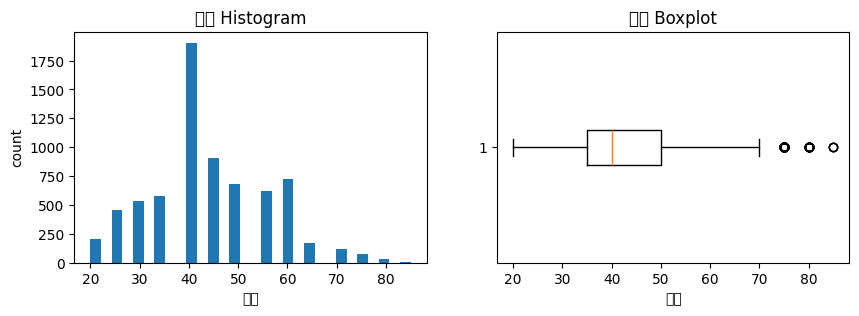

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


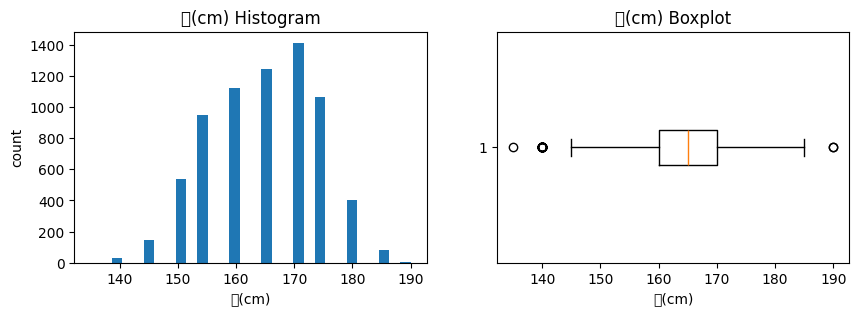

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


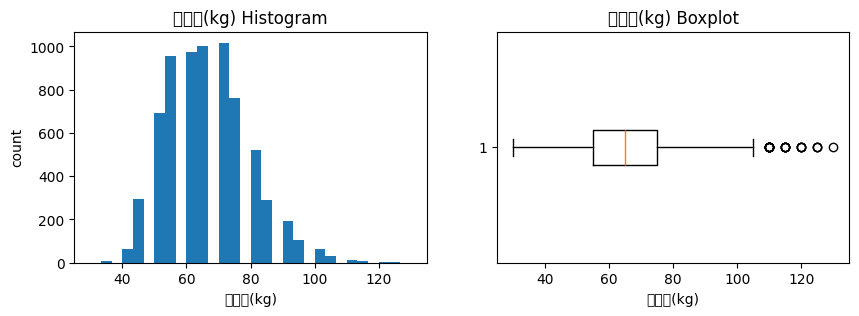

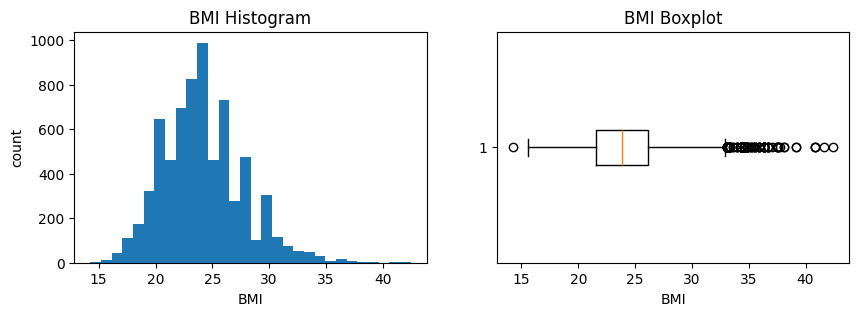

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


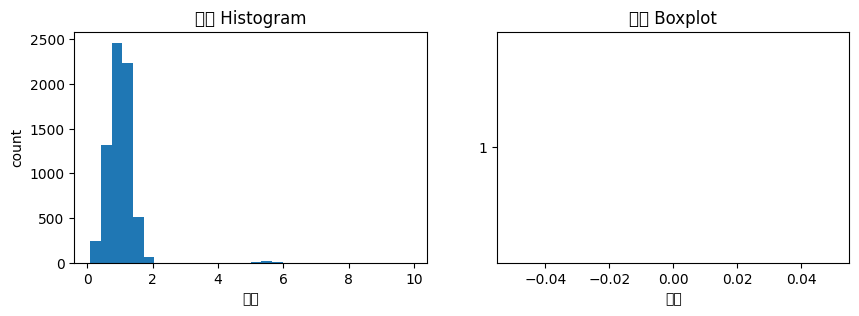

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


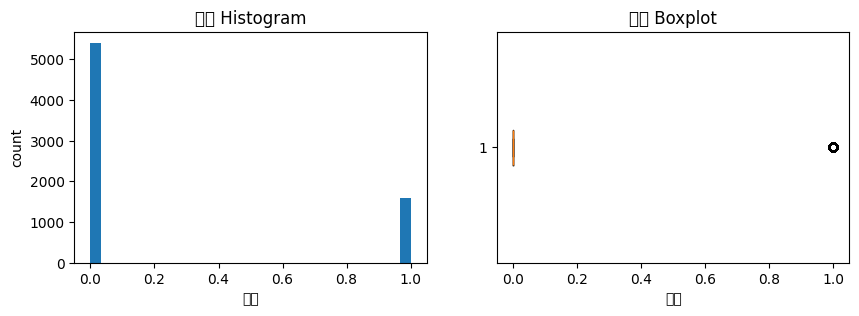

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


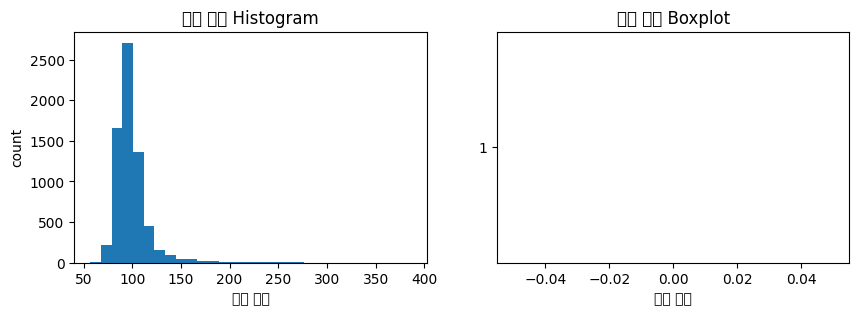

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


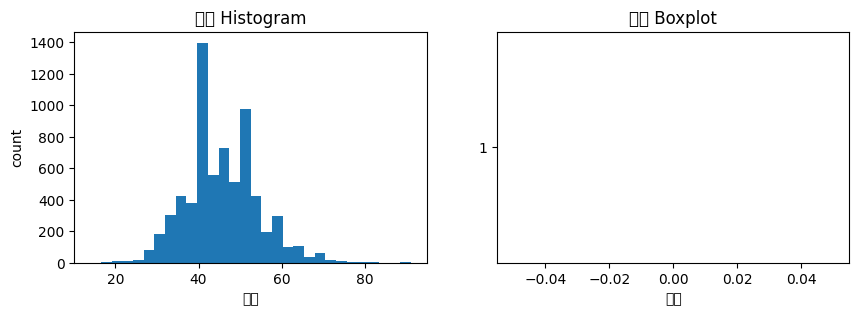

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


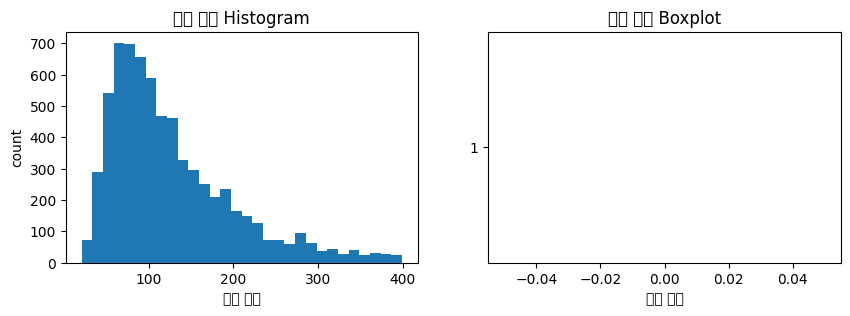

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/

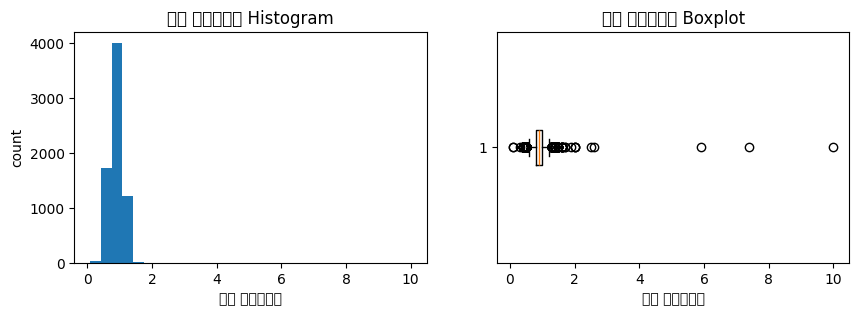

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47204 (\N{HANGUL SYLLABLE ROL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


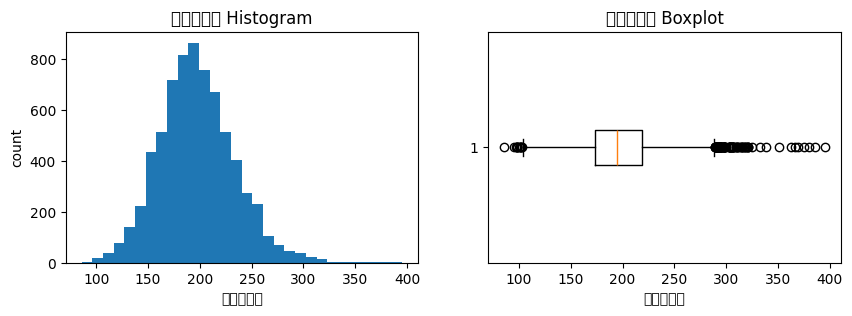

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/I

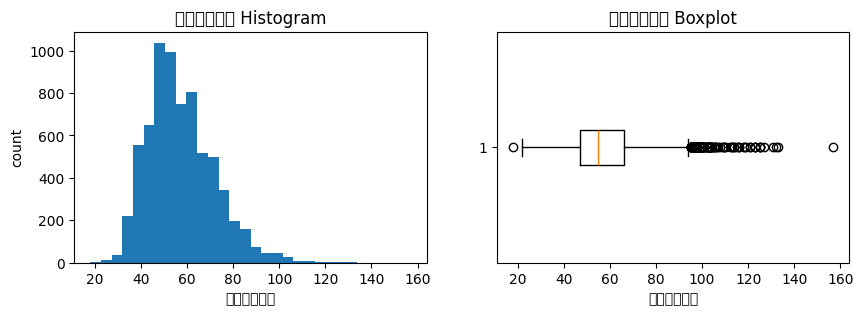

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


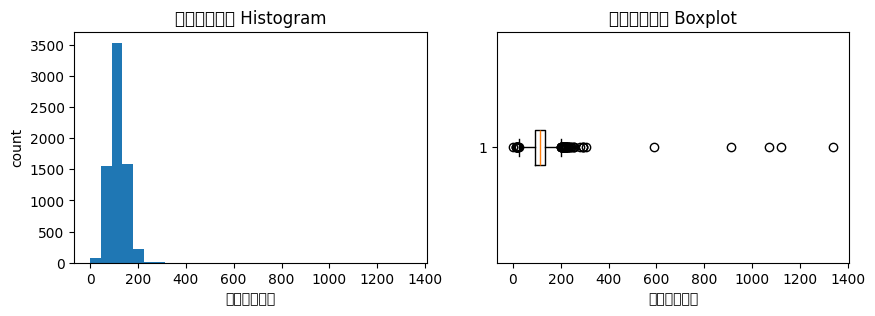

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54756 (\N{HANGUL SYLLABLE HE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/I

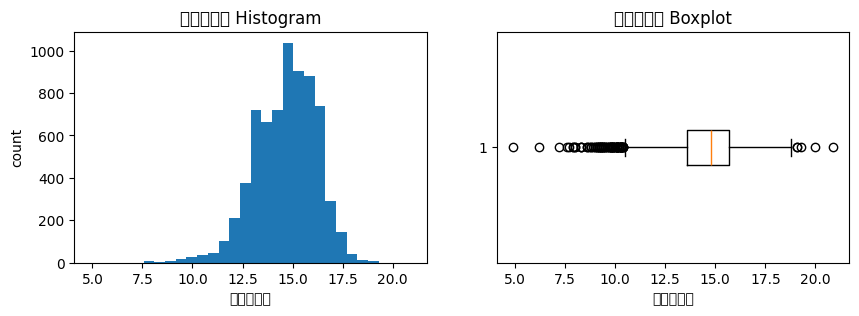

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


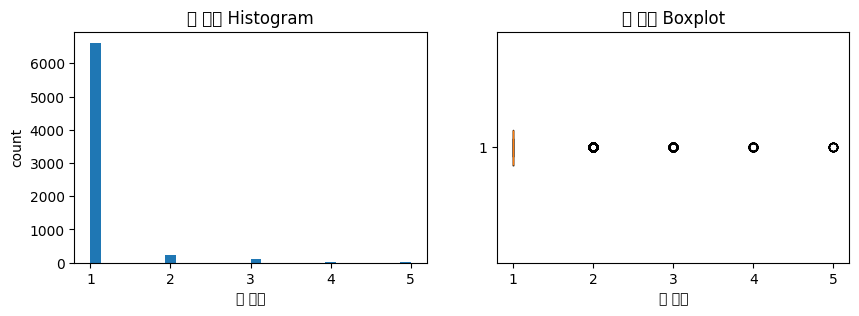

/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54952 (\N{HANGUL SYLLABLE HYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Desktop/anaconda3/envs/alalice/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


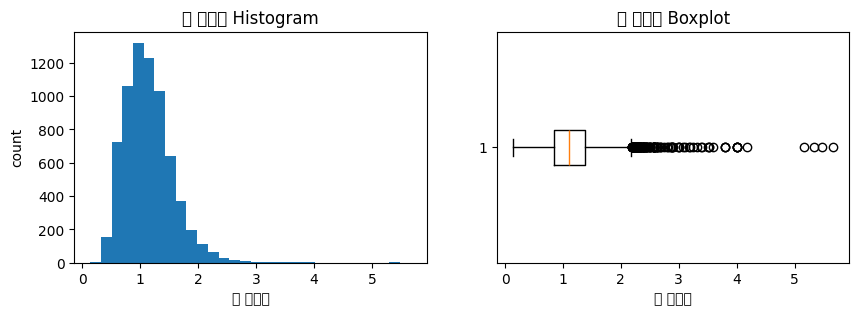

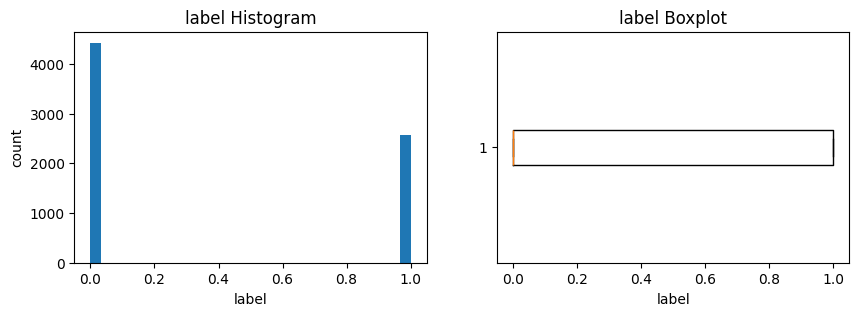

In [4]:
# 숫자형 컬럼만 추출
numeric_cols = df_imp.select_dtypes(include=['number']).columns

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # 히스토그램 
    axes[0].hist(df[col], bins=30)
    axes[0].set_title(f"{col} Histogram")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("count")

    # 박스플롯
    axes[1].boxplot(df[col], vert=False)
    axes[1].set_title(f"{col} Boxplot")
    axes[1].set_xlabel(col)


In [ ]:
### 단변량 분석에서 파악한 내용을 정리해보세요.
# 단변량 분석 결과, 대부분의 변수는 한쪽으로 치우친 비대칭적 분포(skewed distribution)를 보였다.
# 반면, 혈청 크레아티닌은 상대적으로 고른 분포를 보여 개체 간 변동성이 비교적 뚜렷한 변수로 확인되었다.
# Heatmap 분석 결과에서는 헤모글로빈이 흡연 유무와 가장 높은 상관성을 보였다. 
# 이에 헤모글로빈과 연관된 변수들(혈압, 고밀도지단백, 혈청 크레아티닌, 요단백, 간효율)을 집중적으로 알아보기로 했다. 

## 3.이변량 분석
	이변량 분석 의미 찾기:

    •	변수 간 원인–결과 관계 탐색

    •	어떤 요인이 가장 큰 영향을 주는지 도출

    •	향후 예측 모델 설계 시 주요 Feature 후보 선별

- 가설검정시 다음의 항목을 참조하여 수행합니다.
  - 유의수준 : 5%
  - 숫자 --> 숫자 : 상관분석
  - 범주 --> 범주 : 카이제곱검정
  - 범주 --> 숫자 : t검정, 분산분석
  - 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [50]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 가설 1. 흡연자의 헤모글로빈 (g/mL) 수치는 비흡연자보다 높다.
from scipy.stats import ttest_ind
from scipy import stats

data = df_imp

smoker_hb = data[data['label'] == 1]['헤모글로빈']
nonsmoker_hb = data[data['label'] == 0]['헤모글로빈']

t_stat, p_val = stats.ttest_ind(smoker_hb, nonsmoker_hb, equal_var=False)

print(f"\n[가설1] 흡연자 vs 비흡연자 헤모글로빈 수치")
print(f"t통계량: {t_stat:.3f}, p값: {p_val:.5f}")
print(f"흡연자 평균 헤모글로빈 수치: {smoker_hb.mean():.2f}, 비흡연자 평균 헤모글로빈 수치: {nonsmoker_hb.mean():.2f}")



[가설1] 흡연자 vs 비흡연자 헤모글로빈 수치
t통계량: 40.022, p값: 0.00000
흡연자 평균 헤모글로빈 수치: 15.44, 비흡연자 평균 헤모글로빈 수치: 14.16


In [49]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 가설 2. 흡연자의 혈청 크레아티닌 수치는 비흡연자보다 높다.

smoker_cre = data[data['label'] == 1]['혈청 크레아티닌']
nonsmoker_cre = data[data['label'] == 0]['혈청 크레아티닌']

t_stat, p_val = stats.ttest_ind(smoker_cre, nonsmoker_cre, equal_var=False)

print(f"\n[가설2] 흡연자 vs 비흡연자 혈청 크레아티닌")
print(f"t통계량: {t_stat:.3f}, p값: {p_val:.5f}")
print(f"흡연자 평균 혈청 크레아티닌 수치: {smoker_cre.mean():.2f}, 비흡연자 평균 혈청 크레아티닌 수치: {nonsmoker_cre.mean():.2f}")


[가설2] 흡연자 vs 비흡연자 혈청 크레아티닌
t통계량: 18.273, p값: 0.00000
흡연자 평균 혈청 크레아티닌 수치: 0.95, 비흡연자 평균 혈청 크레아티닌 수치: 0.85


In [46]:
# 가설 3. 헤모글로빈 수치가 오르면 혈청크레아티닌 수치도 오른다. 

from scipy.stats import pearsonr
correlation, p_value = pearsonr(data['헤모글로빈'], data['혈청 크레아티닌'])

print(f"[가설3] 헤모글로빈과 혈청 크레아티닌의 피어슨 상관계수 r: {correlation:.3f}")
print(f"p-value: {p_value:.3f}")

# p-value 가 0.05보다 작을 경우 상관관계가 있다고 하는데 헤모글로빈과 혈청 크레아티닌의 p-value = 0.000

[가설3] 헤모글로빈과 혈청 크레아티닌의 피어슨 상관계수 r: 0.340
p-value: 0.000


In [48]:
# 가설 4 흡연을 하면 혈청 크레아티닌과 헤모글로빈 수치가 오른다. 

smoker = data[data['label'] == 1]
nonsmoker = data[data['label'] == 0]

# 피어슨 상관계수 각각 계산
corr_smoker, p_smoker = stats.pearsonr(smoker['혈청 크레아티닌'], smoker['헤모글로빈'])
corr_nonsmoker, p_nonsmoker = stats.pearsonr(nonsmoker['혈청 크레아티닌'], nonsmoker['헤모글로빈'])

print("[가설4] 흡연 여부에 따른 혈청 크레아티닌-헤모글로빈 상관관계")
print(f"흡연자: r = {corr_smoker:.3f}, p = {p_smoker:.5f}")
print(f"비흡연자: r = {corr_nonsmoker:.3f}, p = {p_nonsmoker:.5f}")

[가설4] 흡연 여부에 따른 혈청 크레아티닌-헤모글로빈 상관관계
흡연자: r = 0.121, p = 0.00000
비흡연자: r = 0.343, p = 0.00000


In [51]:
# 가설 5 요단백과 혈청 크레아티닌 수치는 연관이 있다. 

correlation, p_value = pearsonr(data['요 단백'], data['혈청 크레아티닌'])
print(f"[가설5]요 단백과 혈청 크레아티닌의 피어슨 상관계수 r: {correlation:.3f}")
print(f"p-value: {p_value:.3f}")


[가설5]요 단백과 혈청 크레아티닌의 피어슨 상관계수 r: 0.065
p-value: 0.000


In [52]:
# 가설 6. 흡연자의 간효소율은 낮을 것이다.

smoker_lv = data[data['label'] == 1]['간 효소율']
nonsmoker_lv = data[data['label'] == 0]['간 효소율']
t_stat, p_val = stats.ttest_ind(smoker_lv, nonsmoker_lv, equal_var=False)
print(f"[가설6] 흡연자 vs 비흡연자 간 효소율")
print(f"t통계량: {t_stat:.3f}, p값: {p_val:.5f}")
print(f"흡연자 평균 간효소율: {smoker_lv.mean():.2f}, 비흡연자 평균 혈청 크레아티닌 수치: {nonsmoker_lv.mean():.2f}")

[가설6] 흡연자 vs 비흡연자 간 효소율
t통계량: -15.851, p값: 0.00000
흡연자 평균 간효소율: 1.04, 비흡연자 평균 혈청 크레아티닌 수치: 1.21


In [54]:
# 가설 7. 간효소율이 낮아지면 헤모글로빈 수치는 오를 것이다. 

df_pair = df_imp[['간 효소율', '헤모글로빈']]
r, p = stats.pearsonr(df_pair['간 효소율'], df_pair['헤모글로빈'])

print(f"[가설7]간 효소율과 헤모글로빈은 상관관계가 있다.")
print(f"상관계수 (r): {r:.3f}")
print(f"p-value: {p:.5f}")

[가설7]간 효소율과 헤모글로빈은 상관관계가 있다.
상관계수 (r): -0.378
p-value: 0.00000


In [55]:
# 가설 8. 흡연자의 간효소율과 헤모글로빈 수치는 유의미한 상관성이 있다. 
smoker= data[data['label'] == 1]
nonsmoker= data[data['label'] == 0]

# 피어슨 상관계수 각각 계산
corr_smoker, p_smoker = stats.pearsonr(smoker['간 효소율'], smoker['헤모글로빈'])
corr_nonsmoker, p_nonsmoker = stats.pearsonr(nonsmoker['간 효소율'], nonsmoker['헤모글로빈'])

print("[가설8] 흡연 여부에 따른 간 효소율-헤모글로빈 상관관계")
print(f"흡연자: r = {corr_smoker:.3f}, p = {p_smoker:.5f}")
print(f"비흡연자: r = {corr_nonsmoker:.3f}, p = {p_nonsmoker:.5f}")

[가설8] 흡연 여부에 따른 간 효소율-헤모글로빈 상관관계
흡연자: r = -0.279, p = 0.00000
비흡연자: r = -0.365, p = 0.00000


추가적으로 각 건강 지표 간의 관계도 이해해봅시다!
예를 들어, BMI, 혈압, 혈당, 콜레스테롤 등의 수치형 변수들은 서로 영향을 주고받을 수 있으며, 이를 통해 건강 상태를 종합적으로 이해하거나, 향후 모델 설계 및 연구 방향을 제안할 수 있습니다.
추가적인 인사이트를 얻어볼까요 ?

### 상관계수를 구하고 HeatMap으로 시각화 후 분석을 해보세요.
- Heatmap: 변수 간의 상관관계(Correlation)를 색상으로 쉽게 확인할 수 있는 시각화 방법입니다.
- 해석 기준:
  - 값이 1에 가까울수록 → 강한 양의 상관관계
  - 값이 -1에 가까울수록 → 강한 음의 상관관계
  - 값이 0에 가까울수록 → 관계가 약함

이를 통해 변수 간 관계를 한눈에 비교하고, 분석에 필요한 주요 변수를 파악할 수 있습니다.

In [60]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
numeric_df = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
corr_matrix.round(2)

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
나이,1.00,-0.48,-0.33,-0.07,-0.21,-0.12,0.17,0.17,0.01,-0.09,0.04,0.01,0.03,-0.27,0.05,0.18,-0.17
키(cm),-0.48,1.00,0.68,0.16,0.18,0.08,0.02,0.01,0.15,0.36,-0.07,-0.22,-0.03,0.53,-0.01,-0.27,0.39
몸무게(kg),-0.33,0.68,1.00,0.83,0.14,0.06,0.13,0.12,0.34,0.30,0.03,-0.37,0.05,0.50,0.01,-0.43,0.31
BMI,-0.07,0.16,0.83,1.00,0.05,0.03,0.15,0.16,0.34,0.14,0.09,-0.34,0.08,0.27,0.02,-0.38,0.13
시력,-0.21,0.18,0.14,0.05,1.00,0.03,-0.03,-0.03,0.04,0.06,-0.01,-0.04,-0.02,0.13,-0.02,-0.08,0.07
충치,-0.12,0.08,0.06,0.03,0.03,1.00,-0.01,0.01,0.03,0.03,0.02,-0.01,0.00,0.08,-0.01,-0.06,0.10
공복 혈당,0.17,0.02,0.13,0.15,-0.03,-0.01,1.00,0.09,0.22,0.04,0.00,-0.12,-0.00,0.11,0.12,-0.13,0.11
혈압,0.17,0.01,0.12,0.16,-0.03,0.01,0.09,1.00,0.08,0.02,-0.01,-0.05,-0.02,0.05,0.01,-0.05,0.02
중성 지방,0.01,0.15,0.34,0.34,0.04,0.03,0.22,0.08,1.00,0.11,0.23,-0.42,0.01,0.28,0.04,-0.29,0.25
혈청 크레아티닌,-0.09,0.36,0.30,0.14,0.06,0.03,0.04,0.02,0.11,1.00,-0.01,-0.17,0.03,0.34,0.06,-0.14,0.20


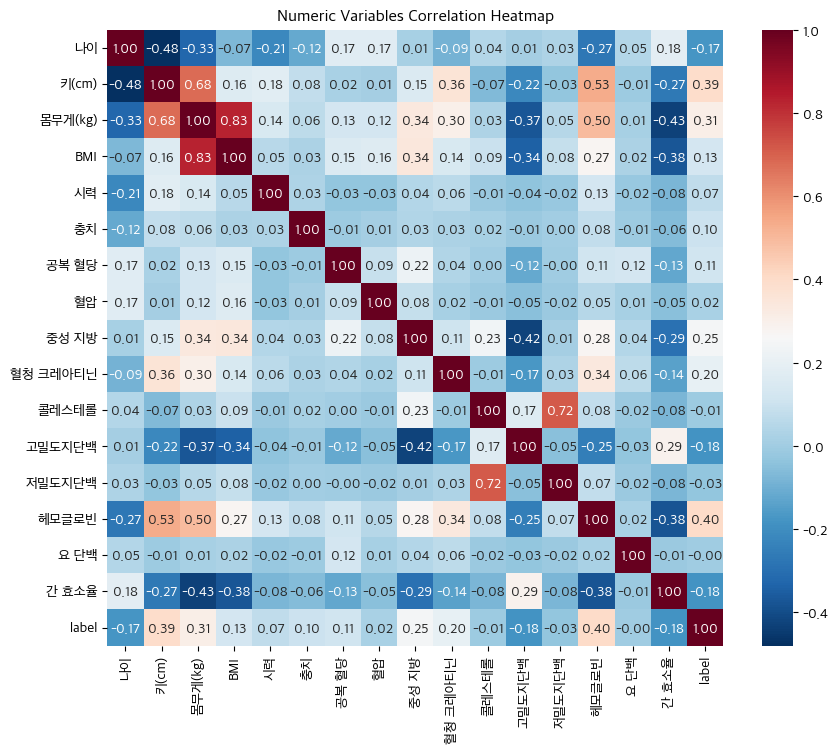

In [61]:
import matplotlib.pyplot as plt
plt.rc('font', family='Apple SD Gothic Neo') 
plt.rc('axes', unicode_minus=False)

plt.figure(figsize=(10, 8))  # 그림 크기 조정
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", square=True)
plt.title("Numeric Variables Correlation Heatmap")
plt.show()

## 5. 관계 정리
- 강한 관계의 변수
- 약한 관계의 변수

In [ ]:
### 강한 관계를 보이는 변수에는 어떤 것이 있나요 ?
# 흡연 - 헤모글로빈 :  0.40으로 헤모글로빈이 높을수록 흡연자인 경향
# 흡연 - 혈청 크레아티닌 : 0.2으로 혈청크레아티닌이 높을수록 흡연자인 경향
# 헤모글로빈 - 혈청 크레아티닌 : 0.34로 헤모글로빈이 오르면 혈청 크레아티닌 수치도 오르는 경향
# 흡연 - 간효소율 : -0.18로 간효소율이 낮을 수록 흡연자인 경향(반비례)
# 헤모글로빈 - 간효소율 : -0.38로 헤모글로빈이 오르면 간효소율은 떨어지는 경향  

In [ ]:
### 약한 관계를 보이는 변수에는 어떤 것이 있나요 ?
# 흡연 - 혈청 크레아티닌 - 헤모글로빈 
# 요단백 - 혈청 크레아티닌 : 0.06
# 흡연 - 간효소율 - 해모글로빈

## 5. 결론 도출
어떤 요인이 흡연 여부와 관련성이 높은지 인사이트 제시

예시)
- 흡연자는 비흡연자에 비해 평균 혈압과 중성지방 수치가 유의하게 높았습니다.(p<0.05)
- 반면, BMI는 유의한 차이가 없었습니다. (p>0.05)
- 따라서 흡연은 대사 관련 지표(혈압, 중성지방)에 더 큰 영향을 미치는 것으로 해석할 수 있습니다.

In [ ]:
### 어떤 요인이 흡연 여부와 관련성이 높을까요 ? 그 이유는?
# 흡연의 영향으로 흡연이 헤모글로빈 수치와 혈청 크레아티닌 수치를 모두 유의하게 증가시키고, 간 효소율은 유의하게 감소시킴을 확인하였다. 
# 반면, 흡연 자체가 헤모글로빈, 혈청 크레아티닌 두 상관관계에서는 유의미한 영향을 줄 수 없었으며 
# 마찬가지로 헤모글로빈과 간 효소율에도 직접적인 영향을 주지 않음을 검정을 통해 확인하였다.